# Density estimation


## Introduction

- Last week we looked a Bayes decision theory
- Nice theoretically, but assumes knolwedge about probablity desnity distribution.
- This is rarely available, so how to we proceed.
- Estimate densities from data!

In this lecture we will cover
- Parametric density estimation
    - Mixture modeling
- Non-parametric density estimation
    - K nearest neighbor approach
- K nearest neighbor classifier

---

## Mixture models

- Take a look at the following data:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Generate data samples from three normal distributions
mean1, cov1 = [2, 3], [[1.5, 0.5], [0.5, 1]]  # Mean and covariance for distribution 1
mean2, cov2 = [6, 5], [[1, -0.3], [-0.3, 1.2]]  # Mean and covariance for distribution 2
mean3, cov3 = [4, 1], [[0.8, 0.2], [0.2, 0.5]]  # Mean and covariance for distribution 3

data1 = np.random.multivariate_normal(mean1, cov1, 300)
data2 = np.random.multivariate_normal(mean2, cov2, 300)
data3 = np.random.multivariate_normal(mean3, cov3, 300)

# Combine the data for visualization
data = np.vstack((data1, data2, data3))

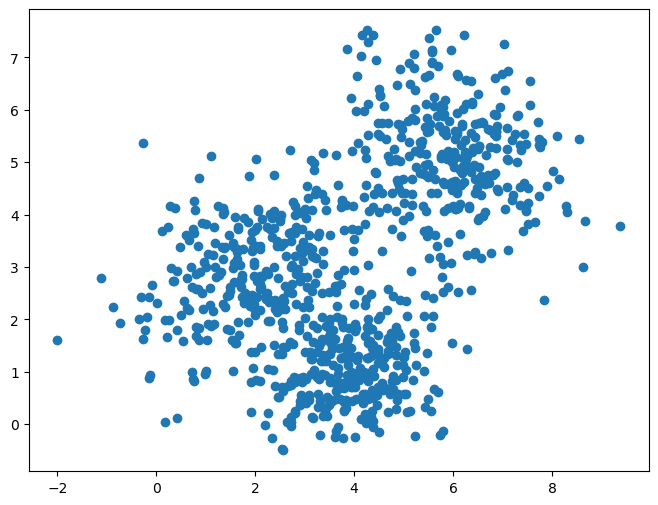

In [2]:
# Plot the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(data[:, 0], data[:, 1])
plt.show()

### How can we handle this "mix" of distributions?

- Model the unknown density $p(\mathbf{x})$ via a linear combination of density functions:
- $p(\mathbf{x})=\sum_{j=1}^{J}p(\mathbf{x}|j)P_j$
- where
    - $\sum_{j=1}^{J}P_j=1$ and $\int p(\mathbf{x}|j) d\mathbf{x}=1$

### What are the implications of this mix of models?

- Assumes that each sample $\mathbf{x}$ may be "drawn" from any of the $J$ distributions.
- What is the problem here?

### How to perform the modeling?

- First step:
    - Assume a parametric form $p(\mathbf{x}|j;\theta)$
- Need to find the unkown parameters $\theta$ and $P_j$ for $j=1,\cdots,J$.
- What would be your first idea?

### How to perform the modeling?

- First idea:
    - Maximize the likelihood function -> $\prod_k p(\mathbf{x}|j;\theta)$
Problem:
    - Unknown parameters enter the maximization task in a nonlinear fashion.

## The Expectation Maximisation (EM) - algorithm

- The EM algorithm is one of the most widely used methods for local maximum likelihood estiamte of parameters.
- Ideally suited to handle incomplete data settings.
- Let $\mathbf{y}$ denote the complete data samples.
    - Probability density function $p_y(\mathbf{y};\theta)$.
- Problem:
    - The samples of $\mathbf{y}$ cannot be directly observed.
    - Instead

## The Expectation Maximisation (EM) - algorithm

- The EM algorithm is one of the most widely used methods for local maximum likelihood estiamte of parameters.
- Ideally suited to handle incomplete data settings.
- Let $\mathbf{y}$ denote the complete data samples.
    - Probability density function $p_y(\mathbf{y};\theta)$.
- Problem:
    - The samples of $\mathbf{y}$ cannot be directly observed.
    - Instead

###  The Expectation (E)-step

- Calculate
- Math
- Interpretation

###  The M-step

- Compute
- Math
- Interpretation

###  Practicla considerations

- Need a starting point for our unknown parameters.
    - Many smart ways to find this starting point, but still a challenging aspect.
- When do we stop iterating? ->

###  Application to mixture modelling

- Consider a case with complete data.
    - Joint events $(\mathbf{x}_k), j_k$.
- Applying Bayes rule gives:
    - $p_y(\mathbf{x}, j_k;\theta)=p_y(\mathbf{x}| j_k;\theta)P_{jk}$.
- Assuming independence between samples, the log-likeligood is:
    - $L(\theta)=\sum_{k=1}^{N} \ln(p_y(\mathbf{x}| j_k;\theta)P_{jk})$

###  Application to mixture modelling

- Consider a case with complete data.
    - Joint events $(\mathbf{x}_k), j_k$.
- Applying Bayes rule gives:
    - $p_y(\mathbf{x}, j_k;\theta)=p_y(\mathbf{x}| j_k;\theta)P_{jk}$.
- Assuming independence between samples, the log-likeligood is:
    - $L(\theta)=\sum$

###  Application to mixture modelling - the Gaussian case

- Consider a case with complete data.
    - Joint events $(\mathbf{x}_k), j_k$.
- Applying Bayes rule gives:
    - $p_y(\mathbf{x}, j_k;\theta)=p_y(\mathbf{x}| j_k;\theta)P_{jk}$.
- Assuming independence between samples, the log-likeligood is:
    - $L(\theta)=\sum$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo
from sklearn.mixture import GaussianMixture

# fetch dataset 
iris = fetch_ucirepo(id=53)
  
# data (as pandas dataframes) 
X = iris.data.features.iloc[:, :2]
X_1_name = 'sepal length (cm)'
X_2_name = 'sepal width (cm)'
y = np.zeros(150)
y[50:100] = 1
y[100:150] = 2
y_names = iris.data.targets


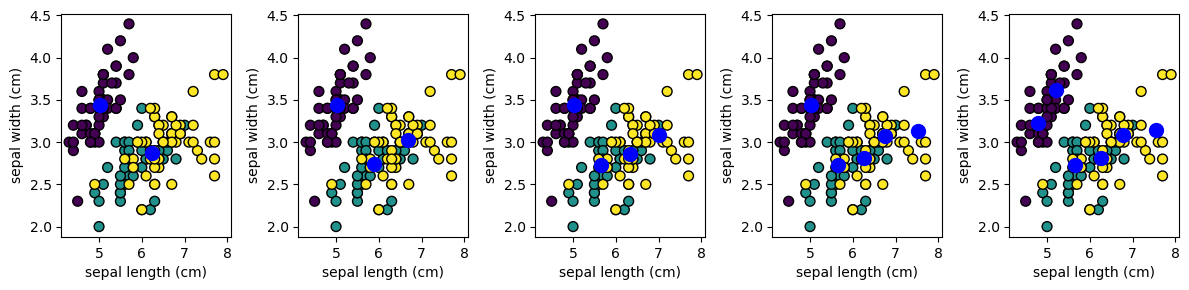

In [14]:
number_of_components = [2,3,4, 5, 6]

plt.figure(1, figsize=(12, 3))
for counter, n_components_i in enumerate(number_of_components):
    gm = GaussianMixture(n_components=n_components_i, random_state=0).fit(X)
    plt.subplot(1, 5, counter+1)
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
    plt.scatter(gm.means_[:, 0], gm.means_[:, 1], s=100, color='blue')
    plt.xlabel(X_1_name)
    plt.ylabel(X_2_name)
plt.tight_layout()
plt.show()

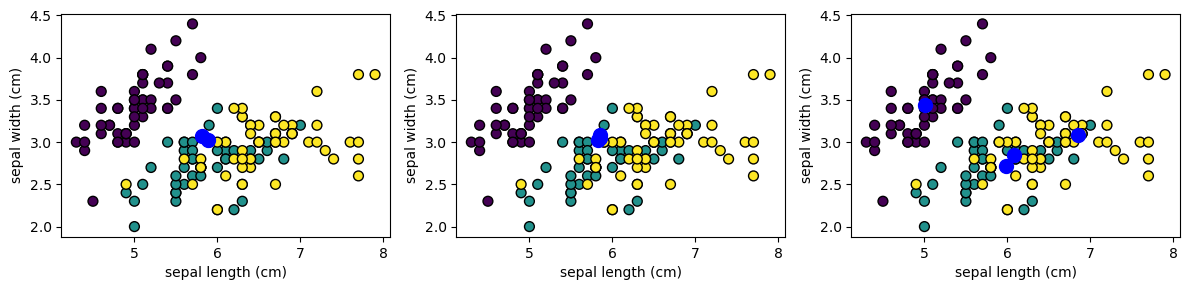

In [17]:
number_of_components = [2, 3, 4]

plt.figure(1, figsize=(12, 3))
for counter, n_components_i in enumerate(number_of_components):
    gm = GaussianMixture(n_components=n_components_i, random_state=1, init_params='random').fit(X)
    plt.subplot(1, 3, counter+1)
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
    plt.scatter(gm.means_[:, 0], gm.means_[:, 1], s=100, color='blue')
    plt.xlabel(X_1_name)
    plt.ylabel(X_2_name)
plt.tight_layout()
plt.show()

## K nearest neighbor density estimation

- Parzen estimation from last lecture:
    - Points are fixed and put "area" around point
- What happens if we reverse the roles?

In [3]:

samples = np.array([
    [1, 1.1], [1.3, 1.2], [0.7, 1.3],  # Spread out within the first cluster
    [4.5, 4.8], [4.8, 5.2],            # Spread out within the second cluster
    [7, 2.5],                          # Separate point moved closer
    [3.5, 6.5],                        # Separate point moved closer
    [8, 8.5]                           # Separate point moved closer
])

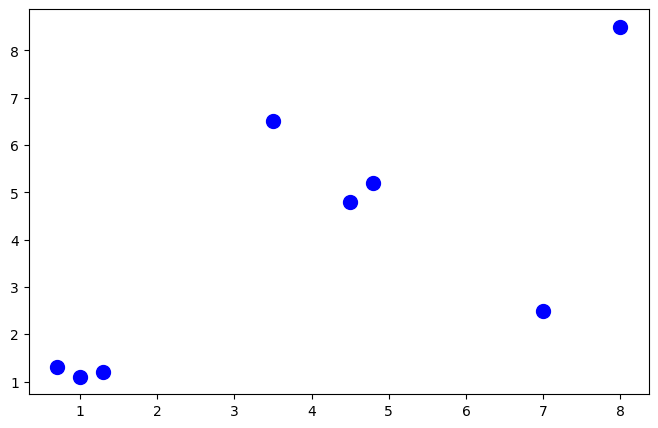

In [4]:
plt.figure(figsize=(8, 5))
plt.scatter(samples[:, 0], samples[:, 1], color='blue', s=100)
plt.show()

## Nearest neighbor classification

- Can create powerful classification algorithms using nearest neighbors.
- Simple idea:
    - Step 1:
    - Step 2:
    - Step 3:
- A bit simplified:
    - What can go wrong above?
    - Limitations?

### Recent advances to address computational burden - FAISS

- FAISS
- [Github repository for FAISS.](https://github.com/facebookresearch/faiss)


### Recent advances to address computational burden - NN-Descent

- FAISS
- [NN-Descent article.](https://www.cs.princeton.edu/cass/papers/www11.pdf)

## Programming exercises

testesq

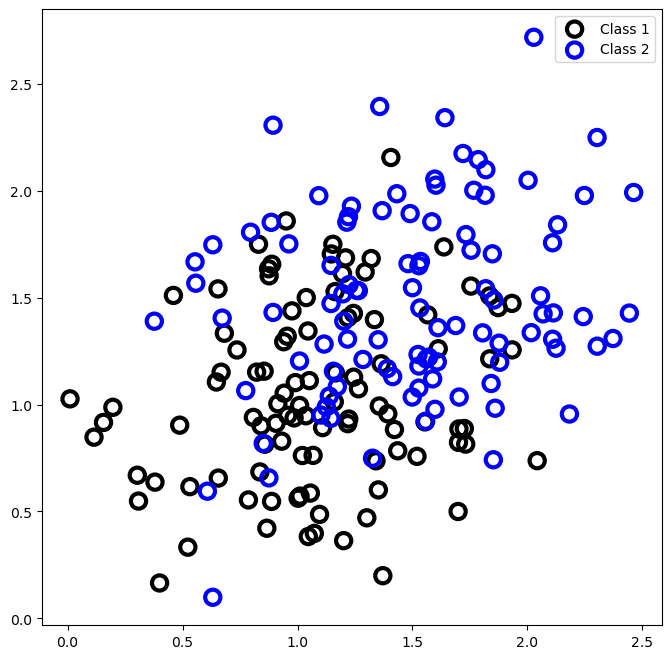

In [17]:
import numpy as np
import matplotlib.pyplot as plt

N = 100

mu1 = np.array([1, 1])
mu2 = np.array([1.5, 1.5])
sigma = np.array([[0.2, 0.0], [0.0, 0.2]])

x1 = np.random.multivariate_normal(mu1, sigma, N)
x2 = np.random.multivariate_normal(mu2, sigma, N)
x = np.concatenate((x1, x2))
y = np.concatenate((np.ones(N), np.zeros(N)))

plt.figure(1, figsize=(8, 8))
plt.scatter(x1[:, 0], x1[:, 1], s=120, facecolors='none',
            edgecolors='black', linewidth=3.0, label='Class 1')
plt.scatter(x2[:, 0], x2[:, 1], s=120, facecolors='none',
            edgecolors='blue', linewidth=3.0, label='Class 2')
plt.legend()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

N = 100

mu1 = np.array([1, 1])
mu2 = np.array([1.5, 1.5])
sigma = np.array([[0.2, 0.0], [0.0, 0.2]])

x1 = np.random.multivariate_normal(mu1, sigma, N)
x2 = np.random.multivariate_normal(mu2, sigma, N)
x = np.concatenate((x1, x2))
y = np.concatenate((np.ones(N), np.zeros(N)))

plt.figure(1, figsize=(8, 8))
plt.scatter(x1[:, 0], x1[:, 1], s=120, facecolors='none',
            edgecolors='black', linewidth=3.0, label='Class 1')
plt.scatter(x2[:, 0], x2[:, 1], s=120, facecolors='none',
            edgecolors='blue', linewidth=3.0, label='Class 2')
plt.legend()
plt.show()

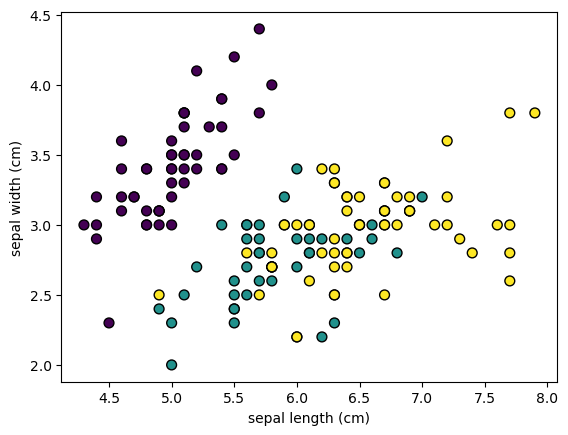

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo

# fetch dataset 
iris = fetch_ucirepo(id=53)
  
# data (as pandas dataframes) 
X = iris.data.features.iloc[:, :2]
X_1_name = 'sepal length (cm)'
X_2_name = 'sepal width (cm)'
y = np.zeros(150)
y[50:100] = 1
y[100:150] = 2
y_names = iris.data.targets


plt.figure(1)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
plt.xlabel(X_1_name)
plt.ylabel(X_2_name)
plt.show()


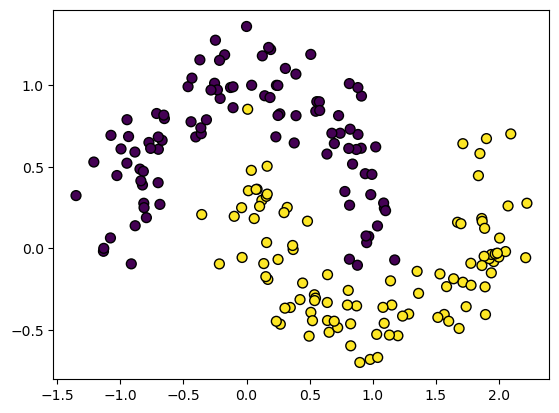

In [6]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200, noise=0.15, random_state=42)

plt.figure(1)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
plt.show()